In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
#import random 
import missingno as msno
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [10]:
data = pd.read_csv('applicants.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
type(data)

pandas.core.frame.DataFrame

In [16]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [20]:
data.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [21]:
data.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
data.notna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,True,True,True,True,True,True,True,True,False,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,True,True,True,True,True,True,True,True,True,True,True,True,True
610,True,True,True,True,True,True,True,True,True,True,True,True,True
611,True,True,True,True,True,True,True,True,True,True,True,True,True
612,True,True,True,True,True,True,True,True,True,True,True,True,True


In [23]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
data.notna().sum()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [28]:
data["Gender"].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: Gender, Length: 614, dtype: bool

In [30]:
data["LoanAmount"].isna().sum()

22

In [31]:
data.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
data.notnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,True,True,True,True,True,True,True,True,False,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,True,True,True,True,True,True,True,True,True,True,True,True,True
610,True,True,True,True,True,True,True,True,True,True,True,True,True
611,True,True,True,True,True,True,True,True,True,True,True,True,True
612,True,True,True,True,True,True,True,True,True,True,True,True,True


In [33]:
pd.unique(data['Gender'])

array(['Male', 'Female', nan], dtype=object)

In [40]:
pd.unique(data['Educatio'])

KeyError: 'Educatio'

In [36]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [38]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:>

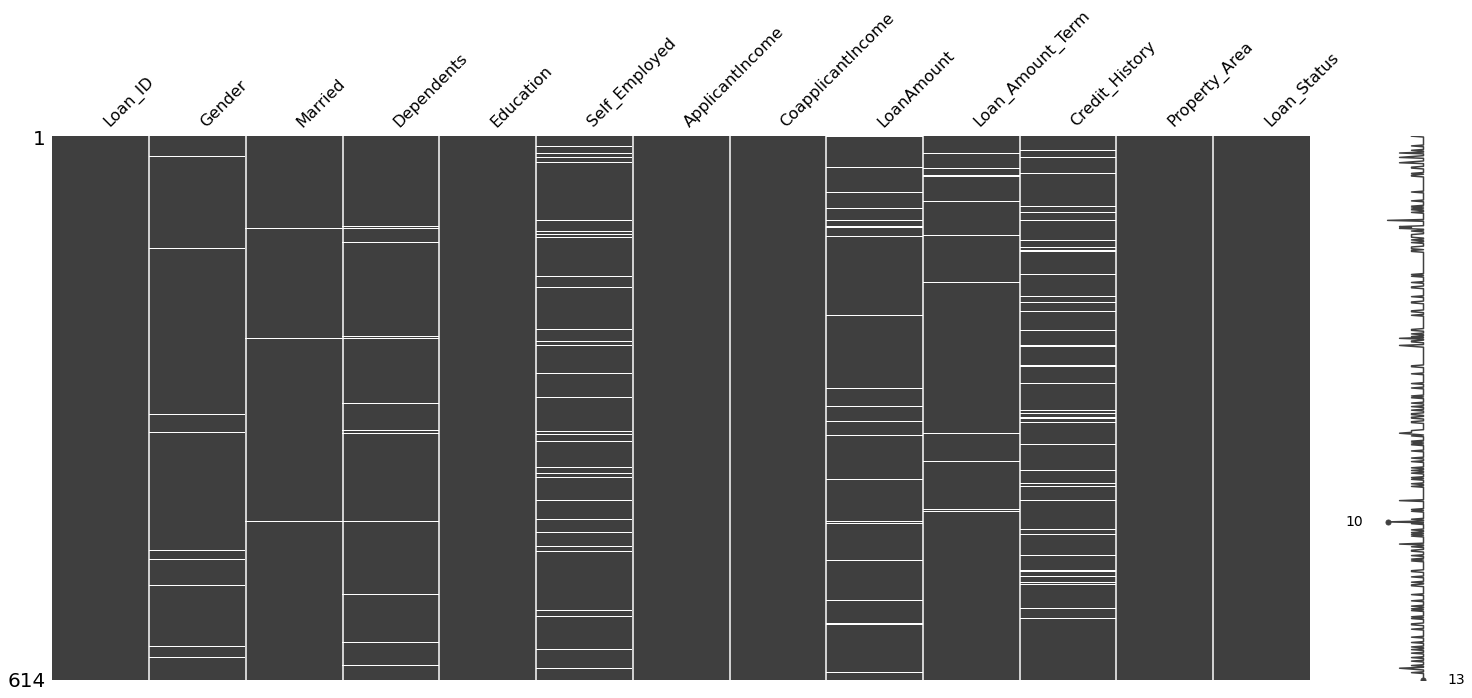

In [39]:
msno.matrix(data)

<AxesSubplot:>

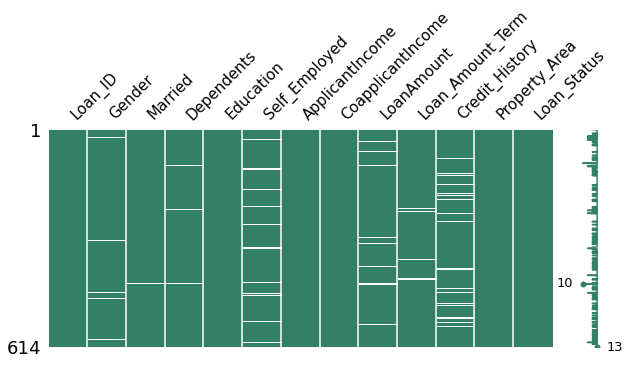

In [41]:
msno.matrix(data,figsize=(10,4),fontsize=15,color=(0.2,0.5,0.4))

<AxesSubplot:>

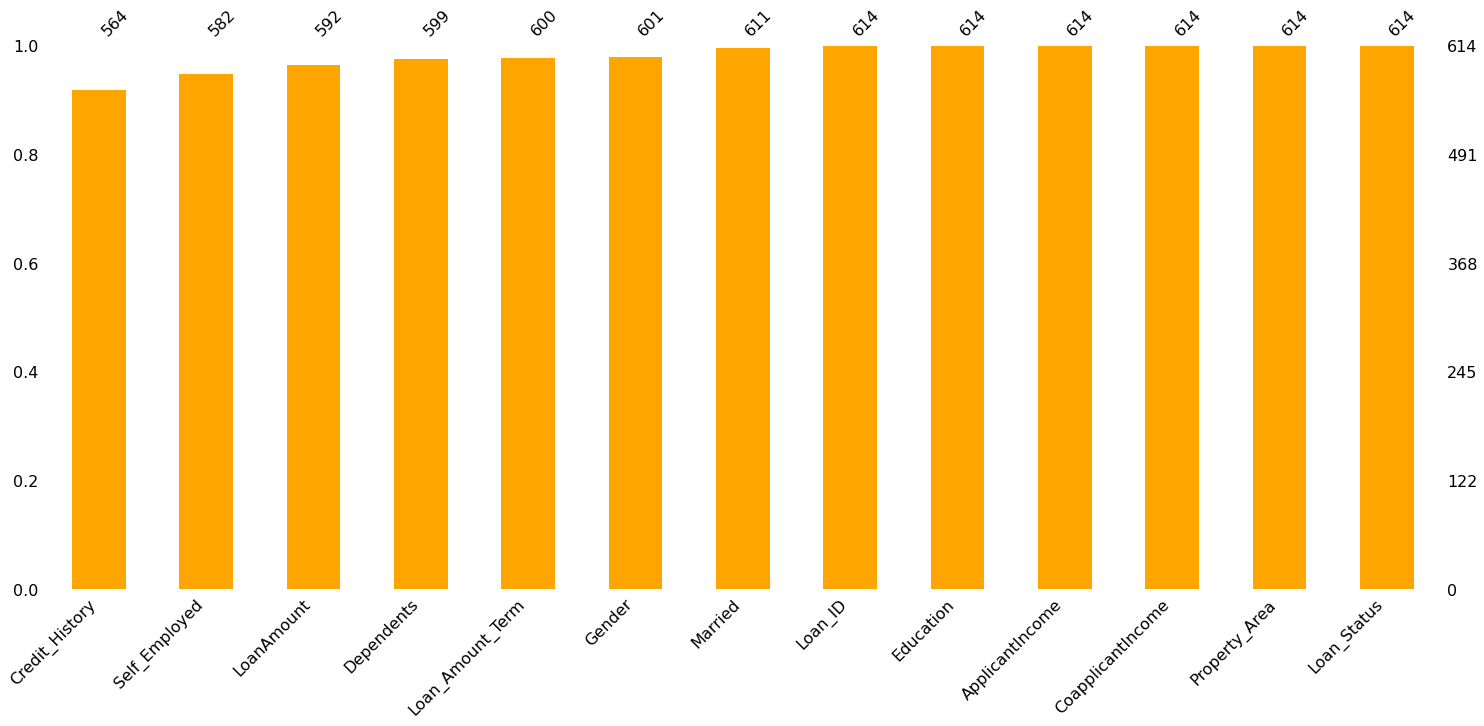

In [44]:
msno.bar(data,color='orange',sort="ascending")

<AxesSubplot:>

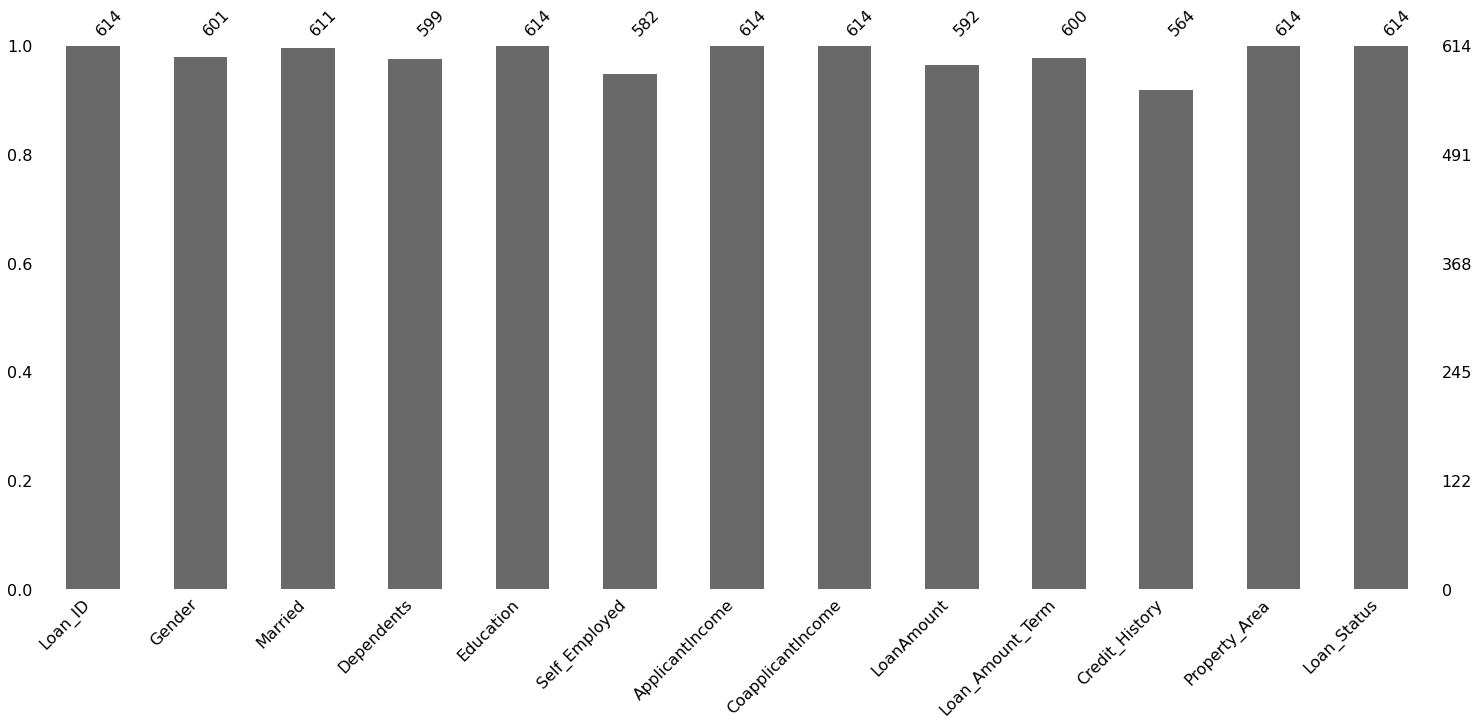

In [45]:
msno.bar(data)

<AxesSubplot:>

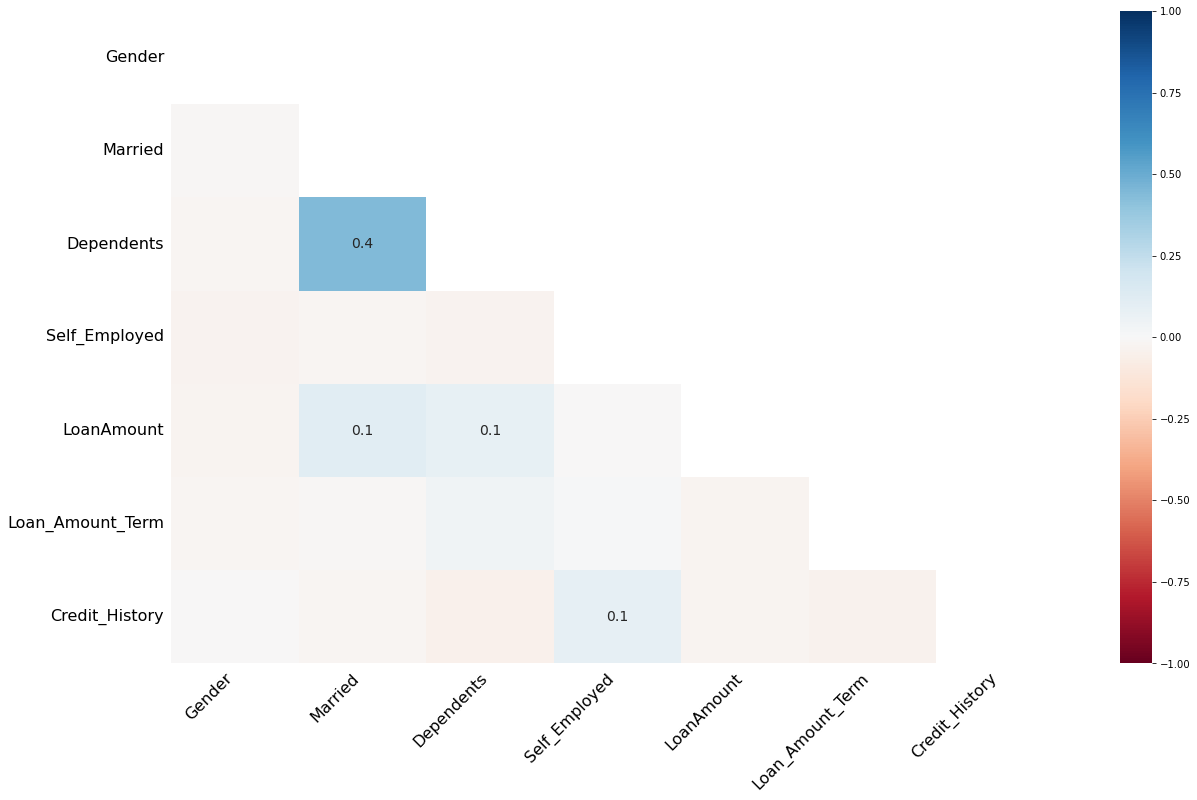

In [46]:
msno.heatmap(data)

<AxesSubplot:>

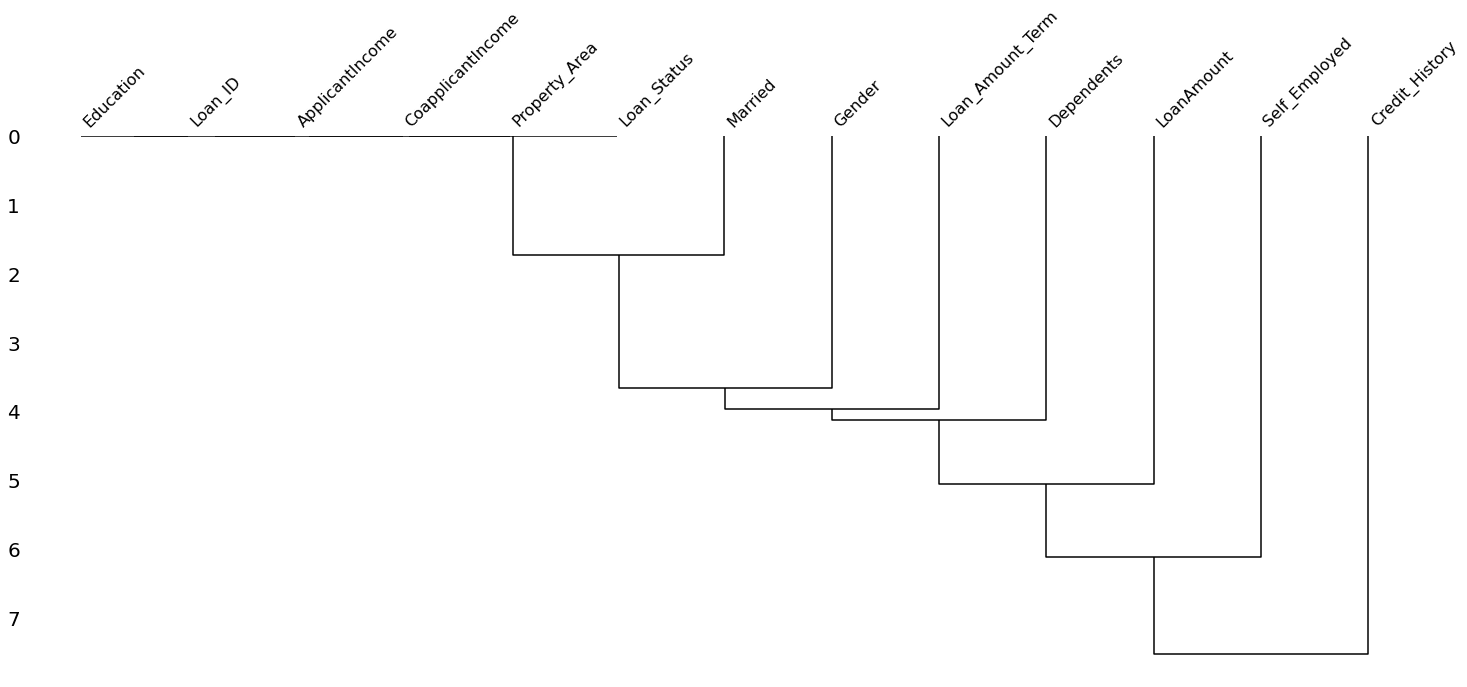

In [48]:
msno.dendrogram(data)

<AxesSubplot:>

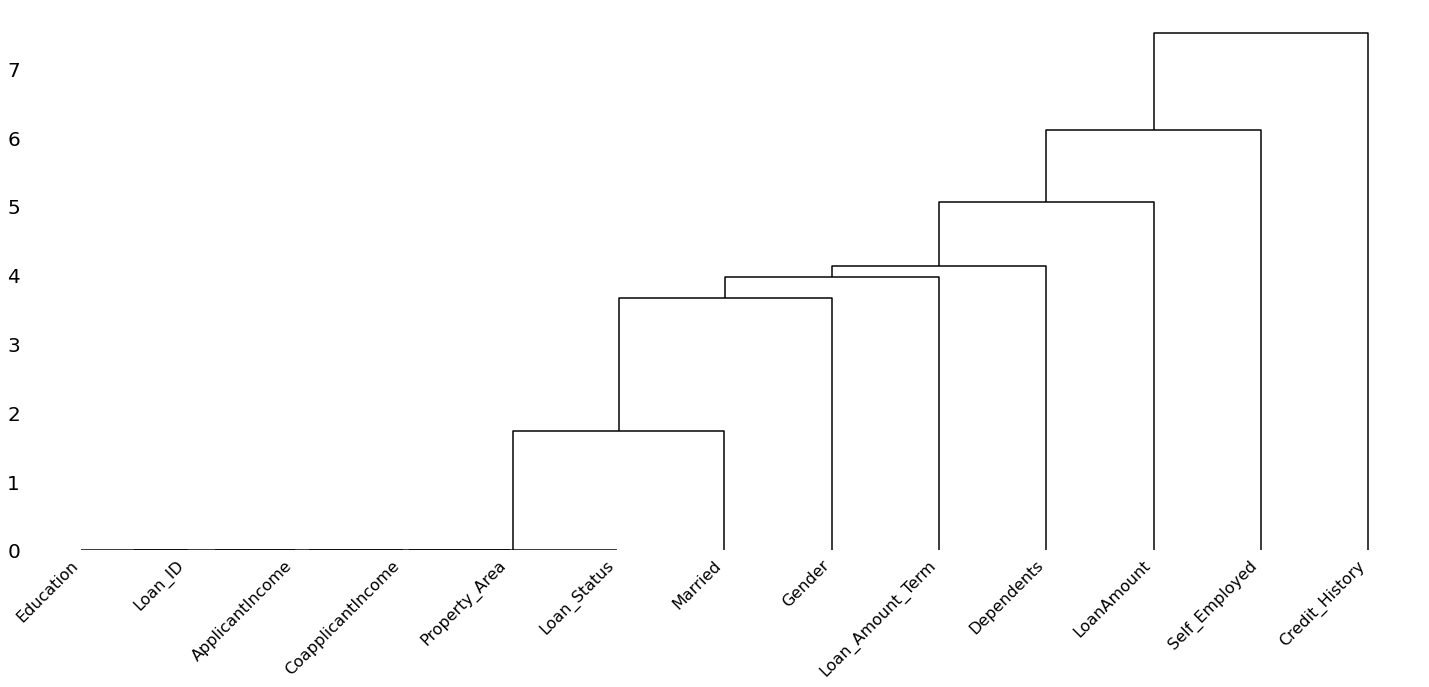

In [49]:
msno.dendrogram(data,orientation="top",fontsize=16)

In [50]:
df = pd.read_csv('students.csv')
df

,name,age,gender,genre
0,A,20.0,0,HipHop
1,B,23.0,0,HipHop
2,C,25.0,0,NaN
3,D,26.0,0,Jazz
4,E,29.0,0,Jazz
5,F,30.0,0,Jazz
6,G,NaN,0,Classical
7,H,33.0,0,Classical
8,I,37.0,0,Classical
9,J,20.0,1,Dance


<AxesSubplot:>

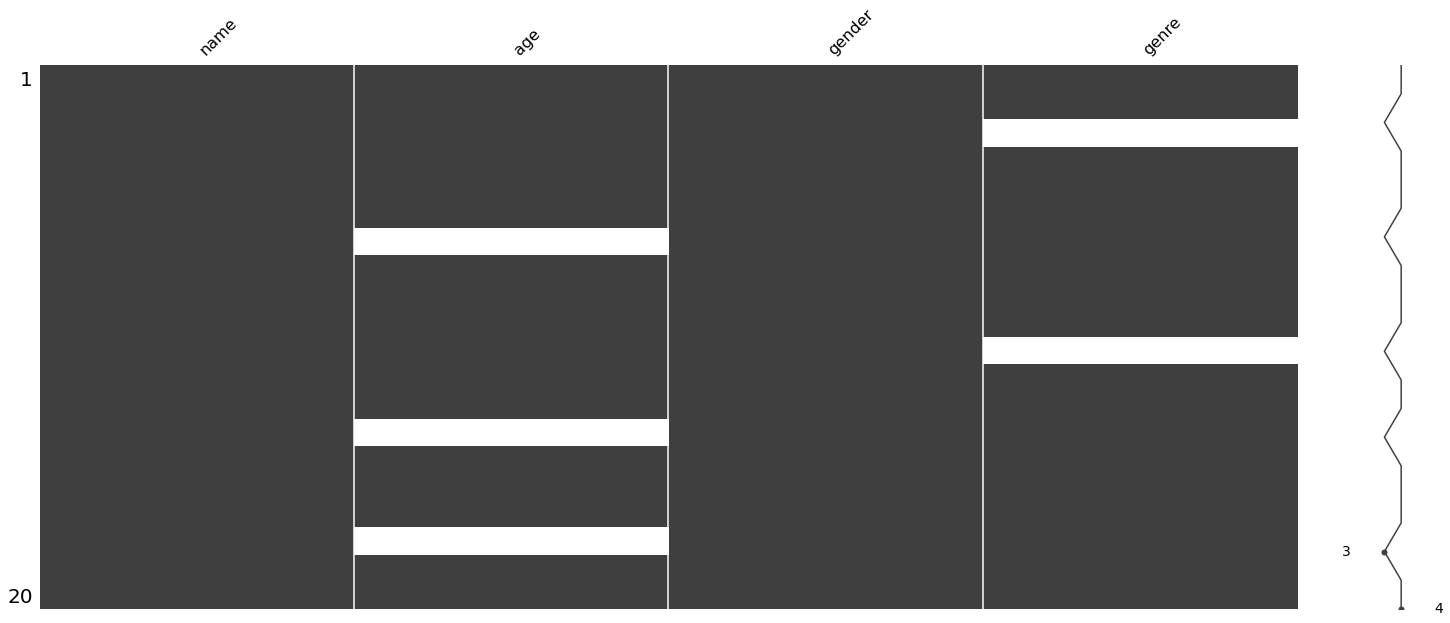

In [51]:
msno.matrix(df)

In [53]:
df.isna()

,name,age,gender,genre
0,False,False,False,False
1,False,False,False,False
2,False,False,False,True
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [54]:
df.isna().sum()

name      0
age       3
gender    0
genre     2
dtype: int64

In [58]:
df.dropna(axis=1,inplace=True)
df

,name,gender
0,A,0
1,B,0
2,C,0
3,D,0
4,E,0
5,F,0
6,G,0
7,H,0
8,I,0
9,J,1


In [60]:
df3 = df.dropna(axis=0)
df3

,name,gender
0,A,0
1,B,0
2,C,0
3,D,0
4,E,0
5,F,0
6,G,0
7,H,0
8,I,0
9,J,1


In [61]:
df = pd.read_csv('students.csv')
df

,name,age,gender,genre
0,A,20.0,0,HipHop
1,B,23.0,0,HipHop
2,C,25.0,0,NaN
3,D,26.0,0,Jazz
4,E,29.0,0,Jazz
5,F,30.0,0,Jazz
6,G,NaN,0,Classical
7,H,33.0,0,Classical
8,I,37.0,0,Classical
9,J,20.0,1,Dance


In [62]:
df3 = df.dropna(axis=0)
df3

,name,age,gender,genre
0,A,20.0,0,HipHop
1,B,23.0,0,HipHop
3,D,26.0,0,Jazz
4,E,29.0,0,Jazz
5,F,30.0,0,Jazz
7,H,33.0,0,Classical
8,I,37.0,0,Classical
9,J,20.0,1,Dance
11,L,25.0,1,Dance
12,M,26.0,1,Acoustic


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    20 non-null     object 
 1   age     17 non-null     float64
 2   gender  20 non-null     int64  
 3   genre   18 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 768.0+ bytes


In [65]:
mydf = df.fillna("unknown")
mydf

,name,age,gender,genre
0,A,20.0,0,HipHop
1,B,23.0,0,HipHop
2,C,25.0,0,unknown
3,D,26.0,0,Jazz
4,E,29.0,0,Jazz
5,F,30.0,0,Jazz
6,G,unknown,0,Classical
7,H,33.0,0,Classical
8,I,37.0,0,Classical
9,J,20.0,1,Dance


In [66]:
mydf = df['age'].fillna('unknown')
mydf

0        20.0
1        23.0
2        25.0
3        26.0
4        29.0
5        30.0
6     unknown
7        33.0
8        37.0
9        20.0
10       21.0
11       25.0
12       26.0
13    unknown
14       30.0
15       31.0
16       34.0
17    unknown
18       20.0
19       33.0
Name: age, dtype: object

In [68]:
imputeValue = df['age'].mean()
#imputeValue
df['age'].fillna(imputeValue,inplace=True)
df

,name,age,gender,genre
0,A,20.000000,0,HipHop
1,B,23.000000,0,HipHop
2,C,25.000000,0,NaN
3,D,26.000000,0,Jazz
4,E,29.000000,0,Jazz
5,F,30.000000,0,Jazz
6,G,27.235294,0,Classical
7,H,33.000000,0,Classical
8,I,37.000000,0,Classical
9,J,20.000000,1,Dance


In [75]:
imputeValue = df['age'].median()
#imputeValue
df['age'].fillna(imputeValue,inplace=True)
df

,name,age,gender,genre
0,A,20.000000,0,HipHop
1,B,23.000000,0,HipHop
2,C,25.000000,0,NaN
3,D,26.000000,0,Jazz
4,E,29.000000,0,Jazz
5,F,30.000000,0,Jazz
6,G,27.235294,0,Classical
7,H,33.000000,0,Classical
8,I,37.000000,0,Classical
9,J,20.000000,1,Dance


In [77]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19     True
dtype: bool

In [78]:
df.duplicated().sum()

2

In [80]:
drop_noDup = df.drop_duplicates()
drop_noDup

,name,age,gender,genre
0,A,20.000000,0,HipHop
1,B,23.000000,0,HipHop
2,C,25.000000,0,NaN
3,D,26.000000,0,Jazz
4,E,29.000000,0,Jazz
5,F,30.000000,0,Jazz
6,G,27.235294,0,Classical
7,H,33.000000,0,Classical
8,I,37.000000,0,Classical
9,J,20.000000,1,Dance


In [81]:
df.dtypes

name       object
age       float64
gender      int64
genre      object
dtype: object

In [91]:
df['age'] = df[('age')].astype(int)


In [88]:
pd.unique(df['age'])

array([20, 23, 25, 26, 29, 30, 27, 33, 37, 21, 31, 34])

In [90]:
df.dtypes

name      object
age        int32
gender     int64
genre     object
dtype: object